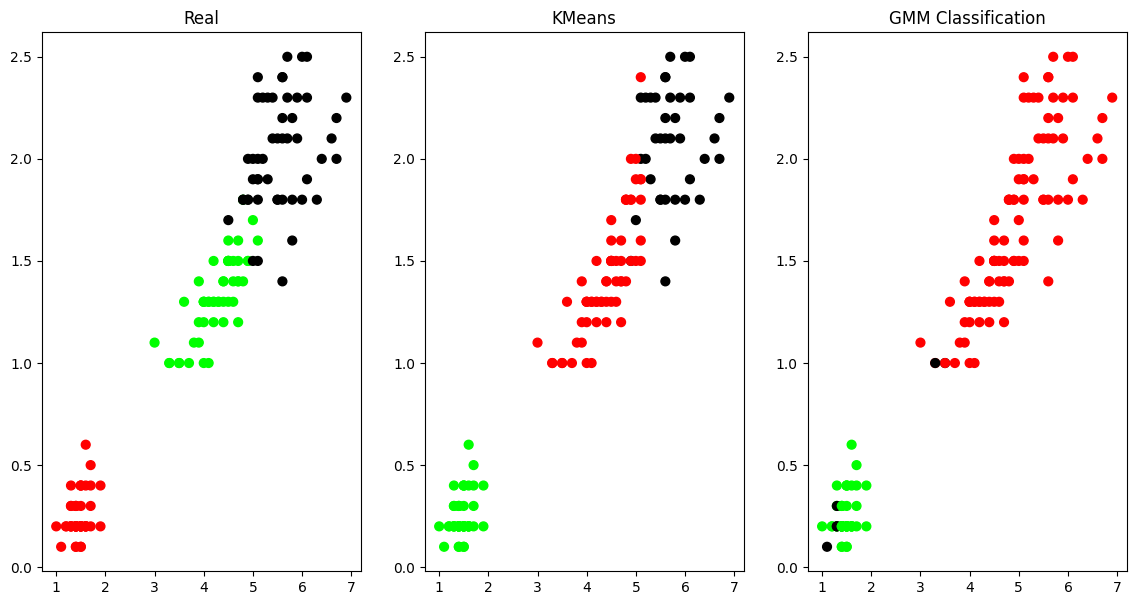

In [1]:
from sklearn.cluster import KMeans  
from sklearn import preprocessing  
from sklearn.mixture import GaussianMixture  
from sklearn.datasets import load_iris  
import sklearn.metrics as sm  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

# Load the Iris dataset  
dataset = load_iris()  

# Convert dataset to DataFrame  
X = pd.DataFrame(dataset.data, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])  
y = pd.DataFrame(dataset.target, columns=['Targets'])  

# Define colormap for visualization  
colormap = np.array(['red', 'lime', 'black'])  

# Check if 'Targets' column exists in y  
if 'Targets' in y.columns:  
    plt.figure(figsize=(14, 7))  

    # REAL PLOT  
    plt.subplot(1, 3, 1)  
    plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)  
    plt.title('Real')  

    # K-PLOT  
    plt.subplot(1, 3, 2)  
    model = KMeans(n_clusters=3, random_state=42, n_init=10)  # Added random_state & n_init for stability  
    model.fit(X)  
    predY = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)  
    plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[predY], s=40)  
    plt.title('KMeans')  

    # GMM PLOT  
    scaler = preprocessing.StandardScaler()  
    xsa = scaler.fit_transform(X)  # Directly transform without extra fit step  
    gmm = GaussianMixture(n_components=3, random_state=42)  # Added random_state for consistency  
    gmm.fit(xsa)  
    y_cluster_gmm = gmm.predict(xsa)  

    plt.subplot(1, 3, 3)  
    plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40)  
    plt.title('GMM Classification')  

    plt.show()  
else:  
    print("Column 'Targets' not found in the dataset")